In [1]:
import sys
from pathlib import Path
# Add the project root to the Python path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

In [2]:
from rag_adaptive import app

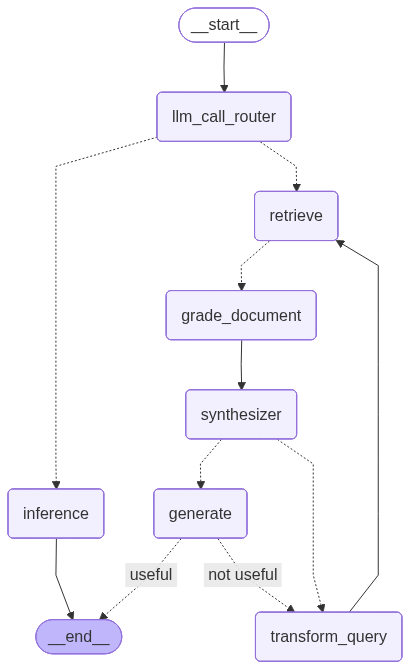

In [3]:
app

In [4]:
import pandas as pd
df_correct = pd.read_csv("../outputs/SPRI_2025_output_eval_correct.csv")
df_incorrect = df_correct[df_correct['correctness'] == False]

In [5]:
inputs = []
for _, row in df_incorrect.iterrows():
    input = {"messages": [{"role": "user",
        "content": row['query']
    }]}
    inputs.append(input)   

In [6]:
def batch_run(inputs):
    import uuid
    config = {"configurable": {"thread_id": str(uuid.uuid4())}}
    res = app.batch(inputs, config=config)
    return res


In [ ]:
res = batch_run(inputs)

In [21]:
len(res)

8

In [22]:
res

[{'messages': [HumanMessage(content='AI 성능이 급격히 향상되었다고 했는데, 신규 벤치마크 점수는 1년 만에 최대 몇 퍼센트까지 향상되었고, 상위권과 10위권 모델의 ELO 점수차 및 상위 2개 모델의 점수차는 각각 얼마인가요?', additional_kwargs={}, response_metadata={}, id='b5defb79-abc1-4bc4-8a91-fbc58b9931b8'),
   AIMessage(content='신규 벤치마크 점수는 1년 만에 최대 71.7%까지 향상되었고, 챗봇 아레나 기준 상위권(1위)과 10위권 모델의 ELO 점수차는 약 5.4%, 상위 2개 모델의 점수차는 약 0.7%입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 858, 'prompt_tokens': 7511, 'total_tokens': 8369, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 768, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CwTxqJOsAr3kwmoF2r7vnQMag4k2r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba83e-c2e8-7d51-80c8-8ba544f08ee5-0', tool_calls=[], i

In [9]:
df_incorrect.head(1)

,Unnamed: 0,query,answer,page_number,outputs.answer,outputs.page_number,retrieved_contexts,correctness,explanation
4,4,"AI 성능이 급격히 향상되었다고 했는데, 신규 벤치마크 점수는 1년 만에 최대 몇 ...","신규 벤치마크 점수는 불과 1년 만에 최대 71.7%까지 향상되었고, 상위권과 10...",9,"요약 작성자와 원저자 구분\n- 요약: ""SPRi 이슈리포트 IS-200"" (요약문...","[9, 10, 7, 11]",### Context #1<document><page_content>SPRi 이슈리...,False,Step 1 — Benchmark improvement: The student co...


In [10]:
df_copy = df_incorrect.copy()

In [11]:
df_copy = df_copy.reset_index(drop=True)

In [12]:
for i, row in df_copy.iterrows():
    df_copy.at[i, 'outputs.answer'] = res[i]['messages'][-1].content
    df_copy.at[i, 'outputs.page_number'] = [d.metadata['page'] for d in res[i]['documents']]

In [13]:
df_copy.iloc[0]['outputs.answer'] == res[0]['messages'][-1].content

True

In [14]:
df_copy

,Unnamed: 0,query,answer,page_number,outputs.answer,outputs.page_number,retrieved_contexts,correctness,explanation
0,4,"AI 성능이 급격히 향상되었다고 했는데, 신규 벤치마크 점수는 1년 만에 최대 몇 ...","신규 벤치마크 점수는 불과 1년 만에 최대 71.7%까지 향상되었고, 상위권과 10...",9,"신규 벤치마크 점수는 1년 만에 최대 71.7%까지 향상되었고, 챗봇 아레나 기준 ...","[9, 10, 7, 11, 25, 6]",### Context #1<document><page_content>SPRi 이슈리...,False,Step 1 — Benchmark improvement: The student co...
1,24,"이 문서의 보고서 번호(IS-200), 발행일(2025.04.15), 한국어 제목과...",보고서 번호: IS-200\n발행일: 2025.04.15\n한국어 제목: A I I...,1,"보고서 번호: IS-200, 발행일: 2025.04.15. 한국어 제목: ""AI I...","[28, 4, 29, 25, 1, 2]",### Context #1<document><page_content>SPRi 이슈리...,False,채점 기준에 따라 항목별로 비교·검토한 결과 다음과 같습니다.\n\n1) 보고서 번...
2,38,"이 문서의 발행일, 문서번호, 제목과 작성자는 누구인가?",발행일: 2025.04.15; 문서번호: IS-200; 제목: AI Index 20...,1,"발행일: 2025.04.15, 문서번호: IS-200, 제목: ""AI Index 2...","[29, 2, 4, 28, 1, 6]",### Context #1<document><page_content>주 의\n===...,False,Step-by-step comparison to the ground truth:\n...
3,66,AI Index 2025에 따르면 책임있는 AI 관련 논문 수는 2023년과 202...,"2023년에는 992편, 2024년에는 1,278편으로 2023→2024 증가율은 ...",13,AI Index 2025에 따르면 책임 있는 AI 관련 논문 수는 2023년 992...,"[12, 6, 7, 4, 22, 13]",### Context #1<document><page_content>SPRi 이슈리...,False,Step 1 — What the ground truth states: The cor...
4,76,2016년부터 2024년까지 제정된 AI 관련법 총 건수와 조사 대상 상위 국가별 ...,"2016년부터 2024년까지 총 204건의 AI 관련법이 제정되었고, 조사 대상 1...",19,2016년부터 2024년까지 제정된 AI 관련법 총 건수는 204건입니다. \n조...,"[19, 20, 6, 19, 7, 15]",### Context #1<document><page_content>SPRi 이슈리...,False,1) 문제에서 요구한 총 건수와 '상위 국가별 건수(미국·한국 포함)'을 기준으로 ...
5,88,"AI Index 2025 연례 보고서를 발행한 기관과 발행월·연도, 보고서 저자 한...","발행 기관은 Institute for Human-Centered AI, Stanfo...",28,AI Index 2025 연례보고서는 스탠퍼드대학교 인간중심 인공지능 연구소(Sta...,"[4, 1, 3, 6, 4, 28]",### Context #1<document><page_content>SPRi 이슈리...,False,단계별 판단:\n1) 발행 기관: 학생 답안은 '스탠퍼드대학교 인간중심 인공지능 연...
6,90,AI Index 2025 자료에 따르면 2023년과 2024년에 책임있는 AI 관련...,"2023년에는 992편, 2024년에는 1,278편이며 증가율은 28.8%입니다.",13,AI Index 2025에 따르면 책임 있는 AI 관련 논문 수는 2023년 992...,"[12, 7, 6, 4, 13, 22]",### Context #1<document><page_content>SPRi 이슈리...,False,1) 문제에서 요구한 것은 2023년과 2024년의 책임있는 AI 관련 논문 수 및...
7,91,AI 성능의 상향 평준화를 뒷받침하는 벤치마크 점수 변화와 상위 모델들 간 ELO ...,새로운 벤치마크 도입 후 불과 1년 만에 벤치마크 점수가 최대 71.7%까지 향상되...,9,신규 벤치마크에서의 성능은 1년 만에 크게 향상되어 MMMU·GPQA·SWE가 각각...,"[9, 10, 25, 9, 4, 7]",### Context #1<document><page_content>SPRi 이슈리...,False,Step 1 — Compare benchmark-score claim: The gr...


In [15]:
res[0]['messages'][-1].content == df_copy.iloc[0]['outputs.answer']

True

In [16]:
query_list = df_copy["query"].to_list()
outputs_answer_list = df_copy["outputs.answer"].to_list()

In [17]:
answer_list = df_copy["answer"].to_list()

In [18]:
from evaluators.llm_evaluator import CorrectnessEvaluator
correctness_evaluator = CorrectnessEvaluator()

In [19]:
results = correctness_evaluator.correctness_batch(query_list, outputs_answer_list, answer_list)
df_copy['correctness'] = [result["correctness"] for result in results]
df_copy['explanation'] = [result["explanation"] for result in results]

2026-01-10 23:11:39,036 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:11:39,324 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:11:39,808 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:11:40,563 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:11:42,638 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:11:49,515 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:11:52,638 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:12:02,052 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [20]:
for index, row in df_copy.iterrows():
    if row['correctness'] == False:
        print("query:" + row['query'])
        print("answer:" + row['answer'])
        print("outputs_answer:" + row['outputs.answer'])
        print("page_number:" + str(row['page_number']))
        print("outputs_page_number:" + str(row['outputs.page_number']))
        print("correctness:" + str(row['correctness']))
        print("explanation:" + row['explanation'])
        print("-" * 100)

query:AI 성능이 급격히 향상되었다고 했는데, 신규 벤치마크 점수는 1년 만에 최대 몇 퍼센트까지 향상되었고, 상위권과 10위권 모델의 ELO 점수차 및 상위 2개 모델의 점수차는 각각 얼마인가요?
answer:신규 벤치마크 점수는 불과 1년 만에 최대 71.7%까지 향상되었고, 상위권과 10위권 모델의 ELO 점수차는 11.9%(`24년)에서 5.4%(`23년)로 감소했으며, 상위 2개 모델의 점수차는 0.7%에 불과합니다.
outputs_answer:신규 벤치마크 점수는 1년 만에 최대 71.7%까지 향상되었고, 챗봇 아레나 기준 상위권(1위)과 10위권 모델의 ELO 점수차는 약 5.4%, 상위 2개 모델의 점수차는 약 0.7%입니다.
page_number:9
outputs_page_number:[9, 10, 7, 11, 25, 6]
correctness:False
explanation:Step 1: 신규 벤치마크 증가치는 학생 답안(71.7%)이 정답(71.7%)과 일치합니다.
Step 2: 상위 2개 모델의 점수차도 학생 답안(약 0.7%)이 정답(0.7%)과 일치합니다.
Step 3: 그러나 상위권(1위)과 10위권 모델의 ELO 점수차와 관련해 정답은 두 시점의 수치(11.9%(`24년)에서 5.4%(`23년)로 감소했다)를 제시하고 있습니다. 학생 답안은 단지 약 5.4%만 적시했을 뿐 11.9%와 ‘감소했다’는 정보를 누락했습니다.
결론: 일부 수치는 맞았지만 정답이 제시한 모든 사실(특히 11.9%와 감소 경향)을 포함하지 않아 정답과 완전히 일치하지 않습니다. 따라서 평가 결과는 False입니다.
----------------------------------------------------------------------------------------------------
query:AI 성능의 상향 평준화를 뒷받침하는 벤치마크 점수 변화와 상위 모델들 간 ELO 점수차의 구체적 수치는 무엇인가?
answer:새로운 벤치마크 도입 후

In [21]:
df_copy

,Unnamed: 0,query,answer,page_number,outputs.answer,outputs.page_number,retrieved_contexts,correctness,explanation
0,4,"AI 성능이 급격히 향상되었다고 했는데, 신규 벤치마크 점수는 1년 만에 최대 몇 ...","신규 벤치마크 점수는 불과 1년 만에 최대 71.7%까지 향상되었고, 상위권과 10...",9,신규 벤치마크 점수는 1년 만에 최대 71.7%까지 향상되었습니다. 챗봇 아레나 기...,"[9, 10]",### Context #1<document><page_content>SPRi 이슈리...,True,1) 신규 벤치마크 점수: 학생 답변은 ‘1년 만에 최대 71.7% 향상’이라고 했...
1,24,"이 문서의 보고서 번호(IS-200), 발행일(2025.04.15), 한국어 제목과...",보고서 번호: IS-200\n발행일: 2025.04.15\n한국어 제목: A I I...,1,한국어 제목: AI Index 2025의 주요 내용 및 시사점. \n영문 subt...,"[3, 28, 12, 1]",### Context #1<document><page_content>SPRi 이슈리...,False,Step-by-step comparison to the ground truth:\n...
2,38,"이 문서의 발행일, 문서번호, 제목과 작성자는 누구인가?",발행일: 2025.04.15; 문서번호: IS-200; 제목: AI Index 20...,1,"발행일: 제공된 문서에서 확인 불가. 문서번호: IS-200. 제목: ""AI Ind...","[29, 4, 28]",### Context #1<document><page_content>주 의\n===...,False,"검토 과정:\n1) 발행일: 정답은 2025.04.15인데, 학생 답변은 ""제공된 ..."
3,66,AI Index 2025에 따르면 책임있는 AI 관련 논문 수는 2023년과 202...,"2023년에는 992편, 2024년에는 1,278편으로 2023→2024 증가율은 ...",13,AI Index 2025에 따르면 책임있는 AI 관련 논문 수는 2023년 992편...,"[12, 4, 13]",### Context #1<document><page_content>SPRi 이슈리...,True,"1) 학생 답안의 2023년 논문 수는 992편으로, 기준 답안의 2023년 수(9..."
4,76,2016년부터 2024년까지 제정된 AI 관련법 총 건수와 조사 대상 상위 국가별 ...,"2016년부터 2024년까지 총 204건의 AI 관련법이 제정되었고, 조사 대상 1...",19,2016년부터 2024년까지 제정된 AI 관련법 총 건수는 204건입니다. \n조...,"[19, 20, 19]",### Context #1<document><page_content>SPRi 이슈리...,True,"1) 총 건수 비교: 학생 답안은 총 204건이라고 명시하고 있는데, 이는 문제의 ..."
5,88,"AI Index 2025 연례 보고서를 발행한 기관과 발행월·연도, 보고서 저자 한...","발행 기관은 Institute for Human-Centered AI, Stanfo...",28,공식 발행 기관은 스탠퍼드 대학교 인간중심 인공지능 연구소(Institute for...,"[4, 21, 6, 4, 19, 28]",### Context #1<document><page_content>SPRi 이슈리...,True,학생 답변은 기준 답안의 세 항목과 모두 일치합니다. \n1) 발행 기관: 학생은 ...
6,90,AI Index 2025 자료에 따르면 2023년과 2024년에 책임있는 AI 관련...,"2023년에는 992편, 2024년에는 1,278편이며 증가율은 28.8%입니다.",13,AI Index 2025에 따르면 책임있는 AI 관련 논문 수는 2023년 992편...,"[12, 4, 13]",### Context #1<document><page_content>SPRi 이슈리...,True,"1) 학생 답변은 2023년 992편, 2024년 1,278편이라고 명시하여 기준 ..."
7,91,AI 성능의 상향 평준화를 뒷받침하는 벤치마크 점수 변화와 상위 모델들 간 ELO ...,새로운 벤치마크 도입 후 불과 1년 만에 벤치마크 점수가 최대 71.7%까지 향상되...,9,"MMMU·GPQA·SWE 등 신규 벤치마크는 1년 만에 각각 18.8%p, 48.9...","[9, 10, 25, 9]",### Context #1<document><page_content>SPRi 이슈리...,False,Step 1: Compare benchmark score claim. The gro...


In [6]:
input = {
        "messages": [
            {
                "role": "user",
                "content": "AI Index 2025에 따르면 책임있는 AI 관련 논문 수는 2023년과 2024년에 각각 몇 편이며 증가율은 얼마인가요?"
            }
        ]
    }
  

In [7]:
import uuid

In [2]:
from rag_adaptive import app

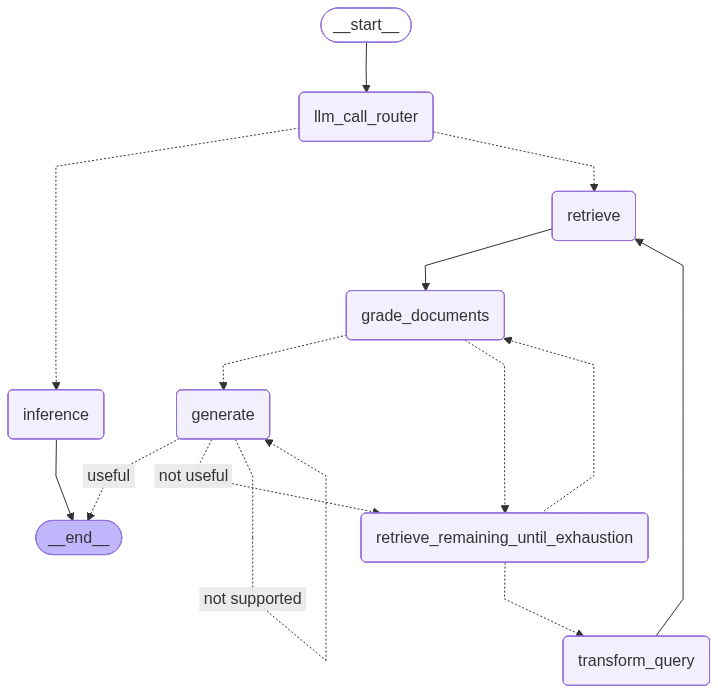

In [3]:
app

In [2]:
from rag_adaptive import retriever

In [3]:
res = retriever.invoke("AI Index 2025에 따르면 책임있는 AI 관련 논문 수는 2023년과 2024년에 각각 몇 편이며 증가율은 얼마인가요?")

2026-01-10 18:22:49,318 - faiss.loader - INFO - Loading faiss with AVX2 support.
2026-01-10 18:22:49,334 - faiss.loader - INFO - Successfully loaded faiss with AVX2 support.


/home/jake/RAG-end-to-end/faiss_index


2026-01-10 18:22:50,024 - httpx - INFO - HTTP Request: POST https://api.upstage.ai/v1/solar/embeddings "HTTP/1.1 200 OK"


In [23]:
from config import output_path_prefix

In [24]:
df_eval = pd.read_csv(f"{output_path_prefix}_synthetic_single.csv")

In [25]:
inputs = []
for _, row in df_eval.iterrows():
    input = {"messages": [{"role": "user",
        "content": row['query']
    }]}
    inputs.append(input)   

In [ ]:
res = batch_run(inputs)

In [27]:
len(res)

100

In [30]:
len(df_copy)

100

In [33]:
res[0]

{'messages': [HumanMessage(content='세계의 CS 교육 보급 수준(2024), 미국 고등학교 CS 과정의 비율 변화(2017→2023), 그리고 대한민국의 AI 교육 커리큘럼 명시는 어떻게 되나요?', additional_kwargs={}, response_metadata={}, id='f6318ae5-f7c6-4873-97e3-84314c929e63'),
  AIMessage(content='- 2024년 전 세계적으로 약 3분의 2의 국가가 초·중·고 CS 과정을 도입했거나 도입할 예정입니다.  \n- 미국의 고등학교에 CS 과정이 포함된 비율은 2017년 35%에서 2023년 60%로 증가했습니다.  \n- 대한민국은 소수 국가 중 하나로 AI 교육 내용을 공식 교육과정에 명시하고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 423, 'prompt_tokens': 4568, 'total_tokens': 4991, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 320, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CwU4QluiATuNLHIWckIvEIvZ3n8Ck', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba844-f8

In [38]:
df_copy = df_eval.copy()
df_copy = df_copy.reset_index(drop=True)
df_copy['outputs.answer'] = [output["generation"].content for output in res]
df_copy['outputs.page_number'] = [[d.metadata['page'] for d in output["documents"]] for output in res]
df_copy['retrieved_contexts'] = [output["context"] for output in res]

In [39]:
df_copy.head(1)

,Unnamed: 0,query,answer,page_number,outputs.answer,outputs.page_number,retrieved_contexts
0,0,"세계의 CS 교육 보급 수준(2024), 미국 고등학교 CS 과정의 비율 변화(20...",2024년 전 세계 국가의 약 2/3가 초중고 차원에서 컴퓨터과학(CS) 과정을 도...,21,- 2024년 전 세계적으로 약 3분의 2의 국가가 초·중·고 CS 과정을 도입했거...,"[21, 22, 22, 27, 5, 4]",### Context #1<document><page_content>SPRi 이슈리...


In [40]:
query_list = df_copy["query"].to_list()
outputs_answer_list = df_copy["outputs.answer"].to_list()
answer_list = df_copy["answer"].to_list()
from evaluators.llm_evaluator import CorrectnessEvaluator
correctness_evaluator = CorrectnessEvaluator()
results = correctness_evaluator.correctness_batch(query_list, outputs_answer_list, answer_list)
df_copy['correctness'] = [result["correctness"] for result in results]
df_copy['explanation'] = [result["explanation"] for result in results]


2026-01-10 23:33:26,795 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:26,880 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:27,293 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:27,422 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:28,114 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:28,436 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:28,524 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:28,743 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-10 23:33:29,224 - httpx 

In [41]:
for index, row in df_copy.iterrows():
    if row['correctness'] == False:
        print("query:" + row['query'])
        print("answer:" + row['answer'])
        print("outputs_answer:" + row['outputs.answer'])
        print("page_number:" + str(row['page_number']))
        print("outputs_page_number:" + str(row['outputs.page_number']))
        print("correctness:" + str(row['correctness']))
        print("explanation:" + row['explanation'])
        print("-" * 100)

query:AI Index 2025 보고서의 제목, 발행일자(출간일) 및 보고서에 기재된 저자들은 누구인가?
answer:보고서 제목은 'AI Index 2025 주요 내용과 시사점'(영문 제목: 'Summary and Implications of 2025 AI Index Report'), 발행일자는 2025.04.15.이며(문서 표시: ISSUE REPORT l 2025.04.15. IS-200), 저자는 안성원, 임영모, 유재흥, 안미소, 장진철, 이해수, 김지원, 임정주입니다.
outputs_answer:제목: "The AI Index 2025 Annual Report" (약칭 AI Index 2025). 발간일: 2025년 4월(문서에 4월 7일로 표기됨). 발행처: AI Index Steering Committee, Institute for Human‑Centered AI, Stanford University (Stanford, CA).  
저자(명시된): Nestor Maslej, Loredana Fattorini, Raymond Perrault, Yolanda Gil, Vanessa Parli, Njenga Kariuki, Emily Capstick, Anka Reuel, Erik Brynjolfsson, John Etchemendy, Katrina Ligett, Terah Lyons, James Manyika, Juan Carlos Niebles, Yoav Shoham, Russell Wald, Armin Hamrah, Lapo Santarlasci, Julia Betts Lotufo, Alexandra Rome, Andrew Shi, Sukrut Oak.  
편집자/기여자 상세 명단은 제공된 문서에서 구체적으로 확인되지 않습니다.
page_number:1
outputs_page_number:[1, 3, 30, 28, 6, 4]
correctness:False
explanation:Step 1 — Compare titles: The ground 

In [ ]:
import time
timestamp = time.strftime('%Y%m%d_%H%M%S')
df_copy.to_csv(f"{output_path_prefix}_eval_correct_adaptive_{timestamp}.csv", index=False)
